In [33]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import importlib

import ast

## Regularization
* penalty_values = [0, 1e-7, 1e-5, 1e-3, 0.01, 0.1, 1]
* [7, 36, 1]
* "tol" : 1e-5
* "compl_inf_tol": 1e-3, "constr_viol_tol": 1e-3

In [18]:
fn = '2024-08-15_20-39-02_reg_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_reg_full = pickle.load(file)

In [4]:
def collect_data(results):
    keys = [k[0] for k in results.keys()]
    keys = list(set(keys))

    def init_di():
        return {key: [] for key in keys}

    times_elapsed = init_di()
    mse_odeint = init_di()
    mse_coll_ode = init_di()
    mse_odeint_test = init_di()
    mse_coll_ode_test = init_di()

    for key in keys:
        for k, v in results.items():
            if k[0] == key:
                times_elapsed[key].append(v['times_elapsed'])
                mse_odeint[key].append(v['mse_odeint'])
                mse_coll_ode[key].append(v['mse_coll_ode'])
                mse_odeint_test[key].append(v['mse_odeint_test'])
                mse_coll_ode_test[key].append(v['mse_coll_ode_test'])

    data = {
        'Times_Elapsed': times_elapsed,
        'MSE_ODEint': mse_odeint,
        'MSE_Coll_ODE': mse_coll_ode,
        'MSE_ODEint_Test': mse_odeint_test,
        'MSE_Coll_ODE_Test': mse_coll_ode_test
    }
    
    df = pd.DataFrame(data, index=keys)
    df.sort_index(inplace=True)
    return df

def plot_boxplots(data1, data2, labels, title, ylabel, colors=('blue', 'green'), color_labels = ['Pyomo', 'Diffrax'],
                  x_label = 'Model Size Configuration'):
    n_groups = len(data1)
    positions_1 = [2 * i + 1.2 for i in range(n_groups)]
    positions_2 = [2 * i + 1.8 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box1 = plt.boxplot(data1, positions=positions_1, widths=0.5, patch_artist=True, boxprops=dict(facecolor=colors[0]))
    box2 = plt.boxplot(data2, positions=positions_2, widths=0.5, patch_artist=True, boxprops=dict(facecolor=colors[1]))
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    xticks = [2 * i + 1.5 for i in range(n_groups)]
    plt.xticks(ticks=xticks, labels=labels)
    
    patch1 = mpatches.Patch(color=colors[0], label=color_labels[0])
    patch2 = mpatches.Patch(color=colors[1], label=color_labels[1])
    
    plt.legend(handles=[patch1, patch2], loc='upper left')
    plt.grid(True)
    plt.show()

def plot_single_boxplot(data, labels, title, ylabel, color='blue', label = 'Data Label',
                        x_label = 'Model Size Configuration'):
    n_groups = len(data)
    positions = [i + 1 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box = plt.boxplot(data, positions=positions, widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    plt.xticks(ticks=positions, labels=labels)
    
    patch = mpatches.Patch(color=color, label=label)  
    
    # plt.axhline(y=min_acc, color='r', linestyle='--', label='Minimum MSE')
    plt.legend(handles=[patch], loc='upper left')
    plt.grid(True)
    plt.show()

In [20]:
df_reg = collect_data(results_reg_full)
MSE_Coll_ODE = df_reg['MSE_Coll_ODE'].tolist()
MSE_Coll_ODE_Test = df_reg['MSE_Coll_ODE_Test'].tolist()

MSE_ODEint = df_reg['MSE_ODEint'].tolist()
MSE_ODEint_Test = df_reg['MSE_ODEint_Test'].tolist()
Times_Elapsed = df_reg['Times_Elapsed'].tolist()

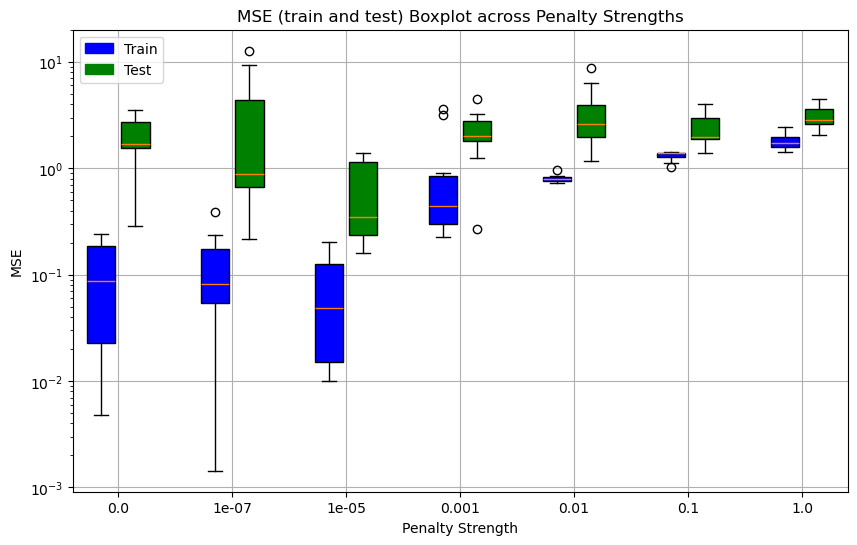

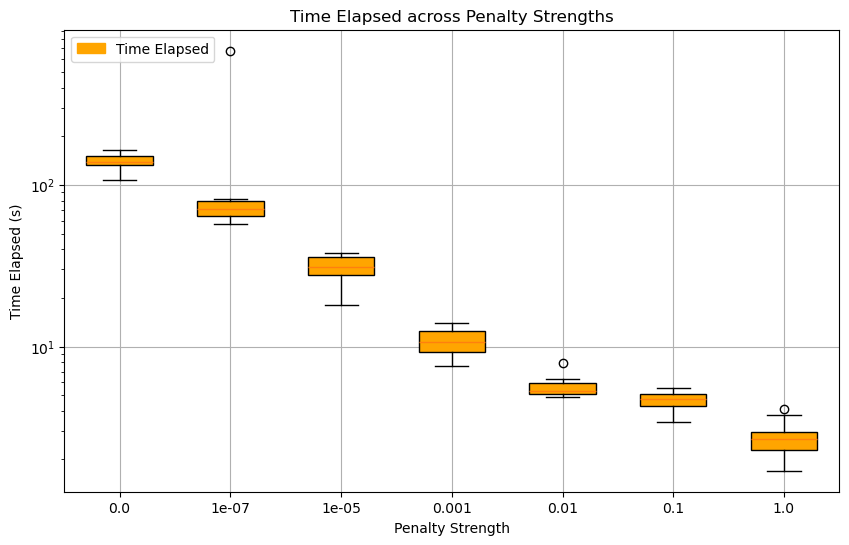

In [21]:
plot_boxplots(MSE_Coll_ODE, MSE_Coll_ODE_Test, df_reg.index, 'MSE (train and test) Boxplot across Penalty Strengths', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Penalty Strength')
# plot_boxplots(MSE_ODEint, MSE_ODEint_Test, df_reg.index, 'MSE Coll ODE', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'])
plot_single_boxplot(Times_Elapsed, df_reg.index, 'Time Elapsed across Penalty Strengths', 'Time Elapsed (s)', color='orange', label='Time Elapsed', x_label = 'Penalty Strength')

---
## Input Features

In [182]:
fn = '2024-08-19_15-13-15_feature_selection.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_feature_selection = pickle.load(file)
    
records = []
for key, values in results_feature_selection.items():
    record = ast.literal_eval(key)
    record.update(values)
    records.append(record)

df = pd.DataFrame(records)
df.sort_values(by='ls', inplace=True)
df['ls'] = [str(ls) for ls in df['ls']]
df.head()

,prev_hour,prev_week,prev_year,m,ls,times_elapsed,mse_odeint,mse_coll_ode,mse_odeint_test,mse_coll_ode_test
13,False,False,False,0,"[4, 32, 1]",3.545858,101.483374,0.176215,266.559002,1.632439
6,False,False,False,1,"[5, 32, 1]",5.393726,125.156086,0.080243,249.550286,1.817134
10,True,False,False,0,"[5, 32, 1]",4.177228,1208.011805,0.010448,1462.042587,0.051284
11,False,False,True,0,"[5, 32, 1]",4.538068,244.256363,0.366051,342.824182,1.970599
12,False,True,False,0,"[5, 32, 1]",5.230899,479.752996,0.145063,649.827811,0.894219


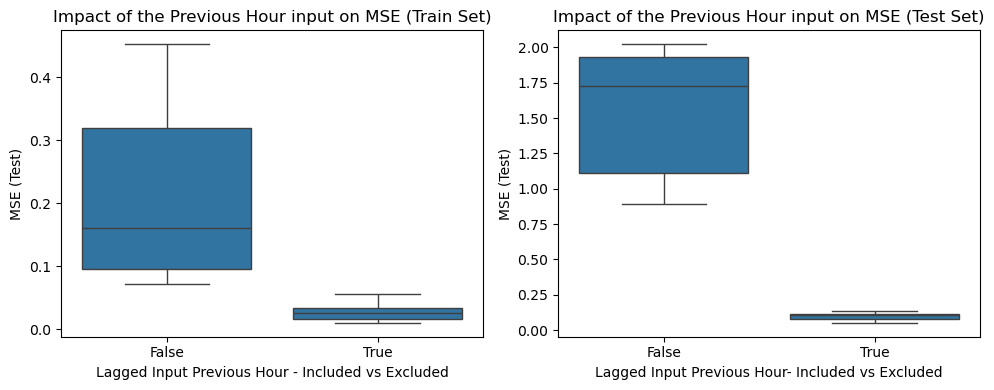

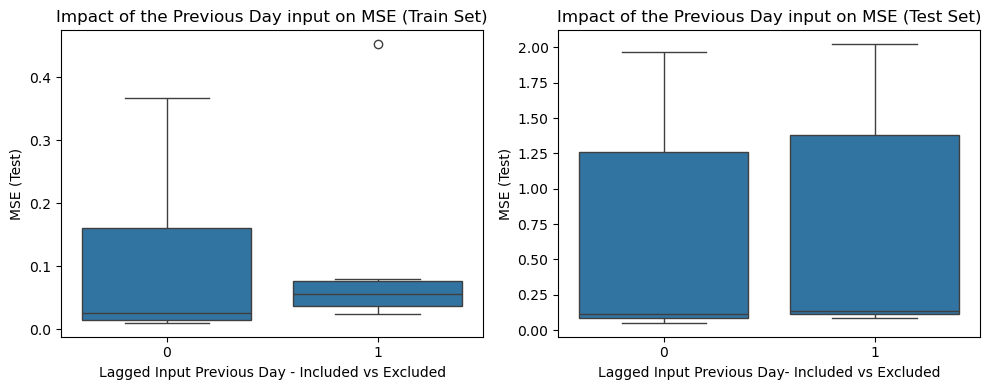

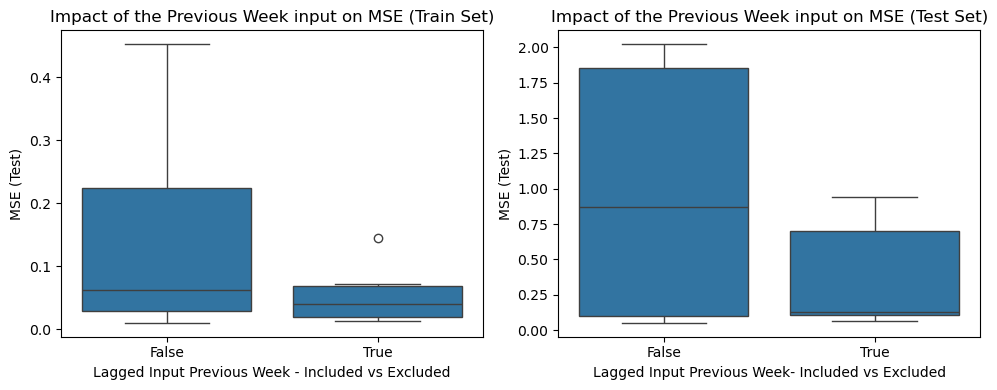

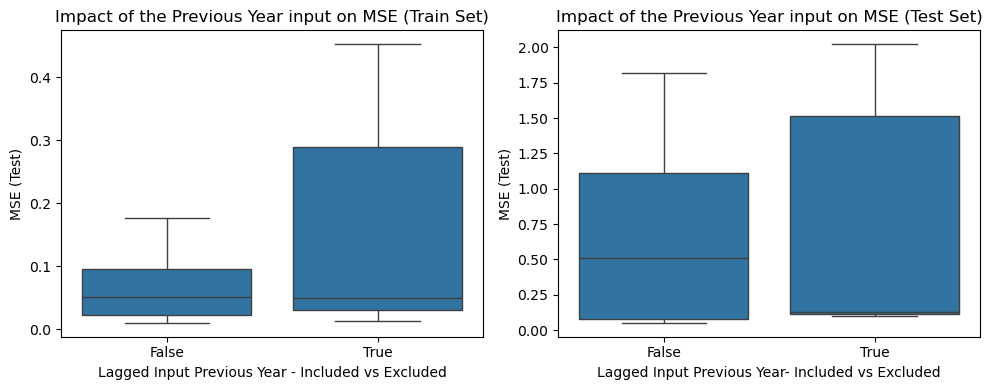

In [225]:
feature_encodings = {'prev_hour':'Previous Hour', 'm':'Previous Day', 'prev_week':'Previous Week', 'prev_year':'Previous Year'}
for feature in feature_encodings:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Adjust the size of the whole figure

    sns.boxplot(x=feature, y='mse_coll_ode', data=df, ax=axes[0])
    axes[0].set_title(f'Impact of the {feature_encodings[feature]} input on MSE (Train Set)')
    axes[0].set_ylabel('MSE (Test)')
    axes[0].set_xlabel(f'Lagged Input {feature_encodings[feature]} - Included vs Excluded')

    sns.boxplot(x=feature, y='mse_coll_ode_test', data=df, ax=axes[1])
    axes[1].set_title(f'Impact of the {feature_encodings[feature]} input on MSE (Test Set)')
    axes[1].set_ylabel('MSE (Test)')
    axes[1].set_xlabel(f'Lagged Input {feature_encodings[feature]}- Included vs Excluded')

    """sns.boxplot(x=feature, y='times_elapsed', data=df, ax=axes[2])
    axes[2].set_title(f'Impact of the {feature_encodings[feature]} input on MSE (Test Set)')
    axes[2].set_ylabel('Training Time (s)')
    axes[2].set_xlabel(f'Lagged Input {feature_encodings[feature]}- Included vs Excluded')"""

    plt.tight_layout()
    plt.show()

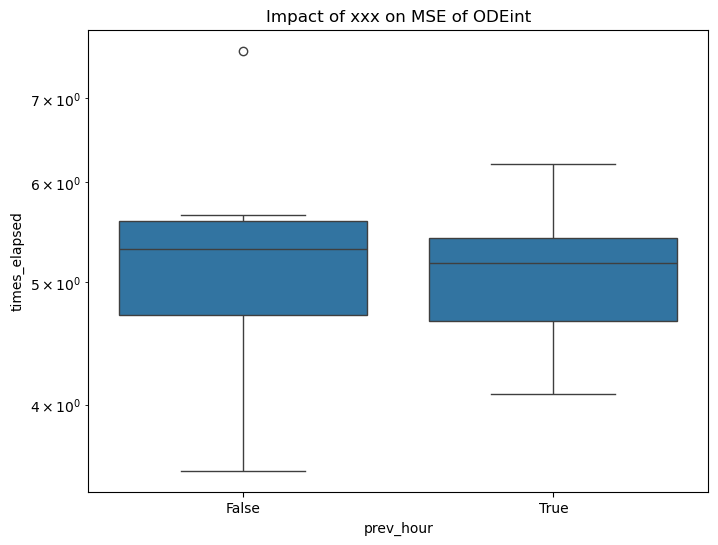

In [219]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='prev_hour', y='times_elapsed', data=df)
plt.title('Impact of xxx on MSE of ODEint')
plt.yscale('log')
plt.show()


----

## Tolerance Mix

In [83]:
fn = '2024-08-17_23-04-25_tol_mix_avg.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tol_mix = pickle.load(file)

In [84]:
results_tol_mix.keys()

dict_keys([(0.0001, 0.01, 0.01, 10), (0.0001, 0.01, 0.01, 1), (0.0001, 0.01, 0.01, 0.1), (0.0001, 0.01, 0.0001, 10), (0.0001, 0.01, 0.0001, 1), (0.0001, 0.01, 0.0001, 0.1), (0.0001, 0.01, 1e-06, 10), (0.0001, 0.01, 1e-06, 1), (0.0001, 0.01, 1e-06, 0.1), (0.0001, 0.0001, 0.01, 10), (0.0001, 0.0001, 0.01, 1), (0.0001, 0.0001, 0.01, 0.1), (0.0001, 0.0001, 0.0001, 10), (0.0001, 0.0001, 0.0001, 1), (0.0001, 0.0001, 0.0001, 0.1), (0.0001, 0.0001, 1e-06, 10), (0.0001, 0.0001, 1e-06, 1), (0.0001, 0.0001, 1e-06, 0.1), (0.0001, 1e-06, 0.01, 10), (0.0001, 1e-06, 0.01, 1), (0.0001, 1e-06, 0.01, 0.1), (0.0001, 1e-06, 0.0001, 10), (0.0001, 1e-06, 0.0001, 1), (0.0001, 1e-06, 0.0001, 0.1), (0.0001, 1e-06, 1e-06, 10), (0.0001, 1e-06, 1e-06, 1), (0.0001, 1e-06, 1e-06, 0.1), (1e-06, 0.01, 0.01, 10), (1e-06, 0.01, 0.01, 1), (1e-06, 0.01, 0.01, 0.1), (1e-06, 0.01, 0.0001, 10), (1e-06, 0.01, 0.0001, 1), (1e-06, 0.01, 0.0001, 0.1), (1e-06, 0.01, 1e-06, 10), (1e-06, 0.01, 1e-06, 1), (1e-06, 0.01, 1e-06, 0.1),

In [87]:
import ast
import pandas as pd

In [88]:
records = []
for key, values in results_tol_mix.items():
    # Ensure the key is a string
    if isinstance(key, tuple):
        record = dict(zip(['param1', 'param2', 'param3', 'param4'], key))
    else:
        record = ast.literal_eval(key)
    record.update(values)
    records.append(record)

df = pd.DataFrame(records)


In [90]:
df.head()

,param1,param2,param3,param4,times_elapsed,mse_odeint,mse_coll_ode,mse_odeint_test,mse_coll_ode_test
0,0.0001,0.01,0.0100,10.0,3.756481,1119.877682,0.48889,1342.326547,0.189962
1,0.0001,0.01,0.0100,1.0,3.741366,1119.877682,0.48889,1342.326547,0.189962
2,0.0001,0.01,0.0100,0.1,4.760326,1119.877682,0.48889,1342.326547,0.189962
3,0.0001,0.01,0.0001,10.0,4.281968,1119.877682,0.48889,1342.326547,0.189962
4,0.0001,0.01,0.0001,1.0,4.622873,1119.877682,0.48889,1342.326547,0.189962


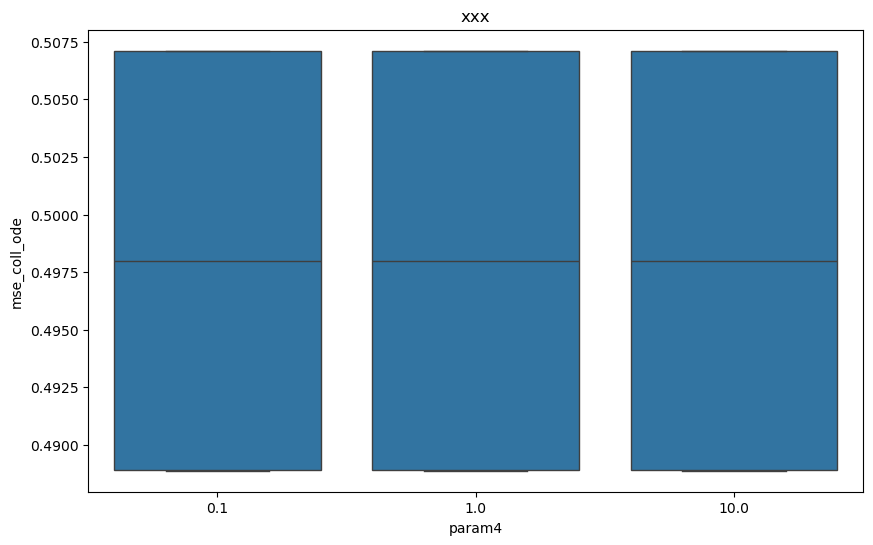

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='param4', y='mse_coll_ode', data=df)
plt.title('xxx')
plt.show()


In [77]:
import itertools
tol = [1e-4, 1e-6, 1e-8]
tol_inf_and_viol = [1e-2, 1e-4, 1e-6]
tol_dual_inf = [10, 1, 1e-1]
param_combinations = list(itertools.product(tol, tol_inf_and_viol, tol_inf_and_viol, tol_dual_inf))

In [82]:
len(param_combinations)*5*2/3

270.0

---
## Spacing Type

In [131]:
pd.Series(df_spacing.index).map({'chebyshev':'chebyshev', 'gauss_legendre':'legendre-gauss', 'gauss_lobatto':'legendre-gauss-lobatto', 'gauss_radau':'legendre-gauss-radau'})

0                 chebyshev
1            legendre-gauss
2    legendre-gauss-lobatto
3      legendre-gauss-radau
dtype: object

In [119]:
df_spacing

,Times_Elapsed,MSE_ODEint,MSE_Coll_ODE,MSE_ODEint_Test,MSE_Coll_ODE_Test
chebyshev,"[4.841195106506348, 3.7586638927459717, 3.2555...","[916.4437245599951, 1205.9258205701635, 1250.6...","[0.7462519293981377, 0.5478648597100227, 0.016...","[1054.993158171157, 1426.3657150739884, 1521.5...","[0.09602811816296221, 0.2204104014486278, 0.56..."
gauss_legendre,"[5.119074106216431, 3.1708972454071045, 3.8793...","[976.1255243984806, 1321.8852129549196, 1653.3...","[0.02210689795132497, 0.040470422935721756, 0....","[899.7334167840513, 1169.3924583595297, 1600.9...","[0.035451896547573684, 0.7762646482736603, 0.0..."
gauss_lobatto,"[6.497797012329102, 3.697187900543213, 4.46836...","[973.0420109793746, 1271.8153844130618, 1315.0...","[0.29514134823151905, 0.4026444691789153, 0.25...","[973.0095958462324, 1215.239546648877, 1464.37...","[0.024731609249534506, 0.10788321003636443, 2...."
gauss_radau,"[4.9753029346466064, 4.152547121047974, 5.4002...","[907.7157251664172, 1196.2334521738835, 1202.5...","[0.011525851525664446, 0.018593410993624392, 0...","[1102.4373181005933, 1349.6428399824106, 1494....","[0.011667788522752355, 0.011606843916557828, 0..."


In [132]:
fn = '2024-08-19_13-40-37_spacing_type_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_spacing_type = pickle.load(file)

df_spacing = collect_data(results_spacing_type)

raname_map = {'chebyshev':'chebyshev', 'gauss_legendre':'legendre-gauss', 'gauss_lobatto':'legendre-gauss-lobatto', 'gauss_radau':'legendre-gauss-radau'}
df_spacing.index = pd.Series(df_spacing.index).map(raname_map)

MSE_Coll_ODE = df_spacing['MSE_Coll_ODE'].tolist()
MSE_Coll_ODE_Test = df_spacing['MSE_Coll_ODE_Test'].tolist()

MSE_ODEint = df_spacing['MSE_ODEint'].tolist()
MSE_ODEint_Test = df_spacing['MSE_ODEint_Test'].tolist()
Times_Elapsed = df_spacing['Times_Elapsed'].tolist()

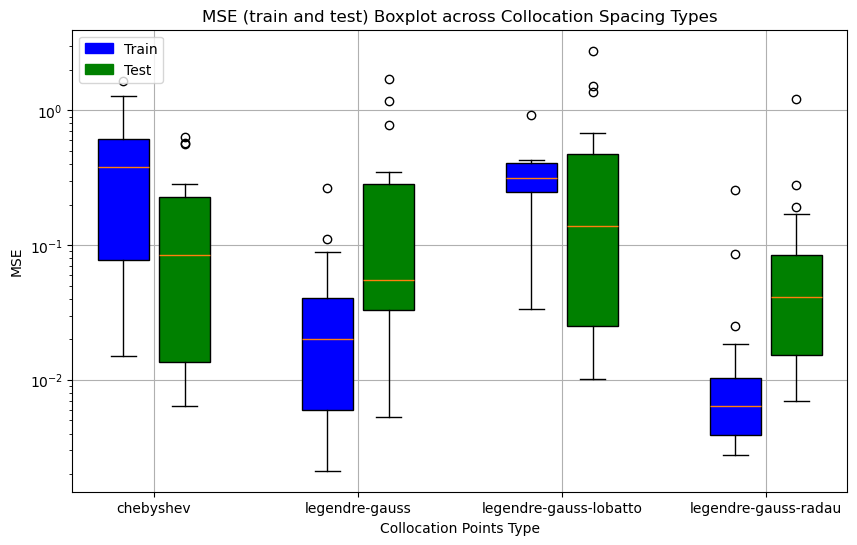

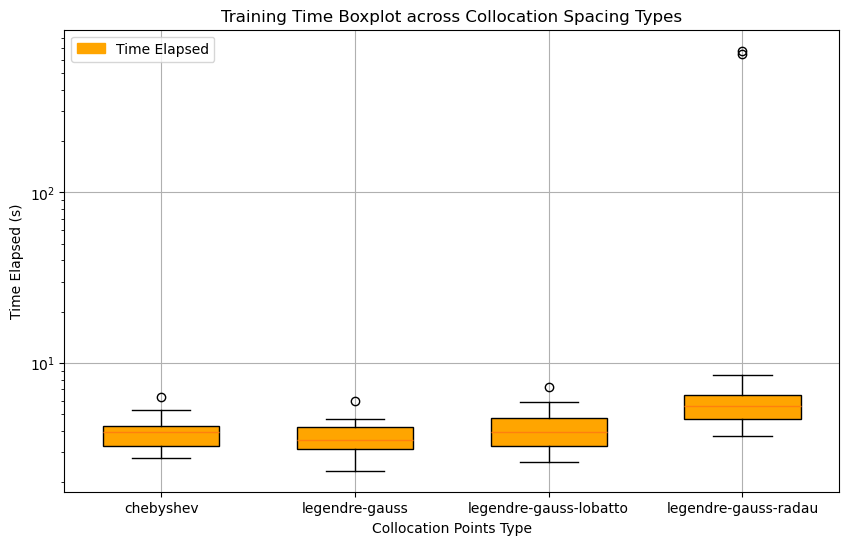

In [151]:
plot_boxplots(MSE_Coll_ODE, MSE_Coll_ODE_Test, df_spacing.index, 'MSE (train and test) Boxplot across Collocation Spacing Types', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Collocation Points Type')
plot_single_boxplot(Times_Elapsed, df_spacing.index, 'Training Time Boxplot across Collocation Spacing Types', 'Time Elapsed (s)', color='orange', label='Time Elapsed', x_label = 'Collocation Points Type')

---
## Tolerance

In [7]:
fn = '2024-08-15_22-45-05_tol_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tol_full = pickle.load(file)

In [8]:
df_tol = collect_data(results_tol_full)
MSE_Coll_ODE = df_tol['MSE_Coll_ODE'].tolist()
MSE_Coll_ODE_Test = df_tol['MSE_Coll_ODE_Test'].tolist()

MSE_ODEint = df_tol['MSE_ODEint'].tolist()
MSE_ODEint_Test = df_tol['MSE_ODEint_Test'].tolist()
Times_Elapsed = df_tol['Times_Elapsed'].tolist()

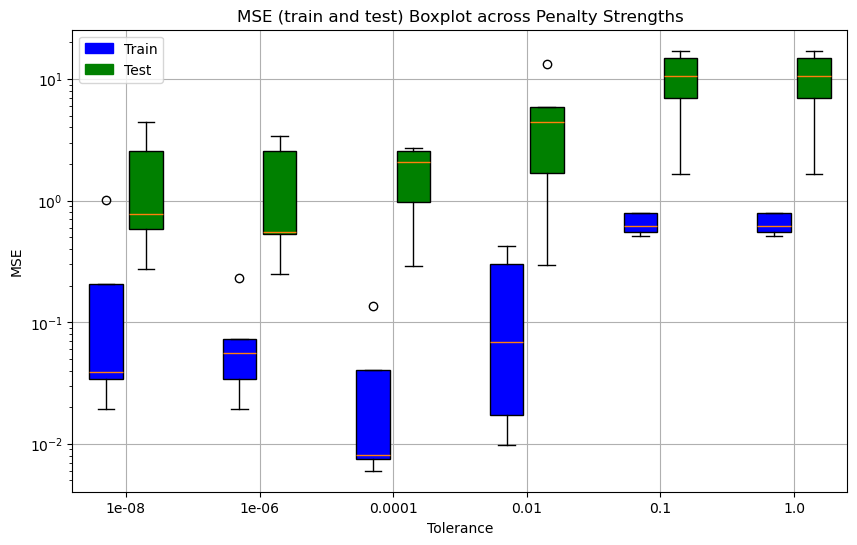

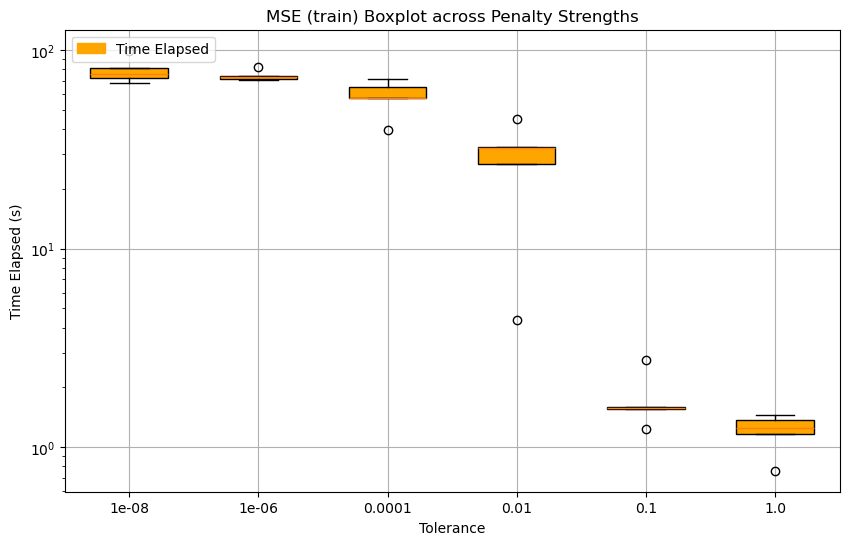

In [9]:
plot_boxplots(MSE_Coll_ODE, MSE_Coll_ODE_Test, df_tol.index, 'MSE (train and test) Boxplot across Penalty Strengths', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Tolerance')
#plot_boxplots(MSE_ODEint, MSE_ODEint_Test, df_tol.index, 'MSE Coll ODE', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Tolerance')
plot_single_boxplot(Times_Elapsed, df_tol.index, 'MSE (train) Boxplot across Penalty Strengths', 'Time Elapsed (s)', color='orange', label='Time Elapsed', x_label = 'Tolerance')

---
## Regularization - Tolerance grid search

In [10]:
fn = '2024-08-16_12-41-29_tol_reg_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tol_reg_full = pickle.load(file)

In [11]:
fn = '2024-08-16_12-41-40_tol_reg_avg.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tol_reg_avg = pickle.load(file)

* To create a heatmap of the reg. and tol. values, create a dataframe with the following columns:
    * "penalty"
    * "tol"
    * "mean_test_score"
* `key[0]` is a tuple `(PENALTY, TOL)`

In [12]:
df_reg_tol = collect_data(results_tol_reg_full)

penalty = [i[0] for i in df_reg_tol.index]
tol = [i[1] for i in df_reg_tol.index]

def mean_of_list(lst):
    return sum(lst) / len(lst) if lst else None

df_reg_tol = df_reg_tol.map(mean_of_list)

df_reg_tol['Penalty'] = penalty
df_reg_tol['Tolerance'] = tol
df_reg_tol.reset_index(drop=True, inplace=True)

In [13]:
df_reg_tol.head()

,Times_Elapsed,MSE_ODEint,MSE_Coll_ODE,MSE_ODEint_Test,MSE_Coll_ODE_Test,Penalty,Tolerance
0,111.776554,53.471367,0.066309,95.163311,2.323467,0.0,1.000000e-08
1,152.728333,8.042448,0.082329,6.766372,1.452066,0.0,1.000000e-06
2,82.247447,82.218840,0.040925,118.547182,1.531300,0.0,1.000000e-04
3,41.408996,237.341205,0.151236,352.786075,4.910221,0.0,1.000000e-02
4,1.751040,0.612332,0.652102,14.563527,10.193938,0.0,1.000000e-01


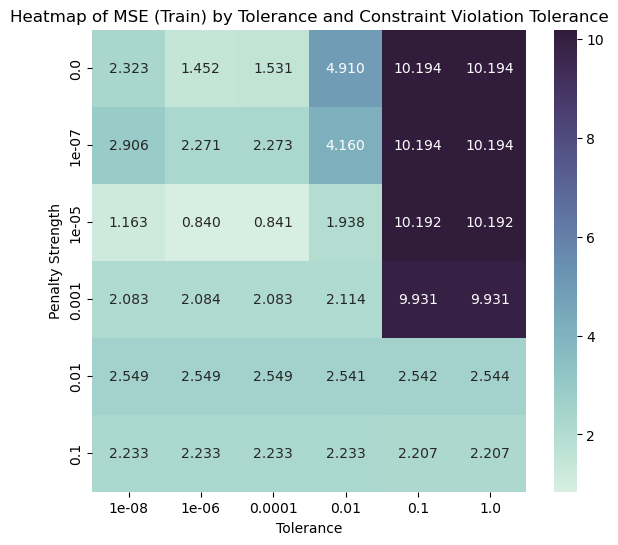

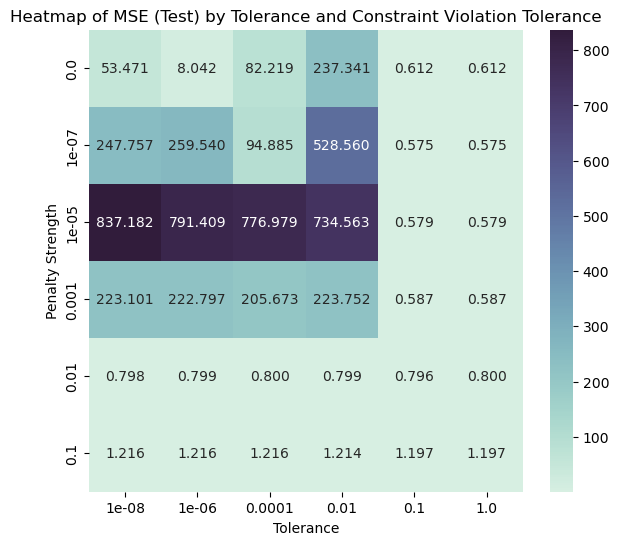

In [29]:
plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE (Train) by Tolerance and Constraint Violation Tolerance')
plt.ylabel('Penalty Strength')
plt.show()

pivot_table = df_reg_tol.pivot(index='Penalty', columns=['Tolerance'], values='MSE_ODEint')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE (Test) by Tolerance and Constraint Violation Tolerance')
plt.ylabel('Penalty Strength')
plt.show()

pivot_table = df_reg_tol.pivot(index='Penalty', columns=['Tolerance'], values='MSE_Coll_ODE_Test')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)

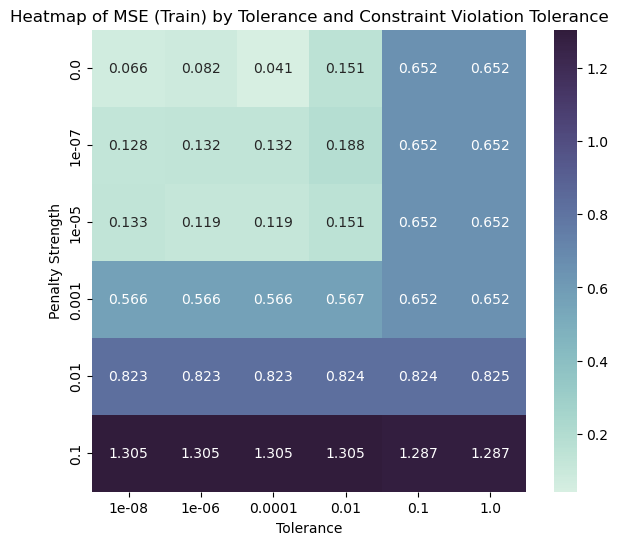

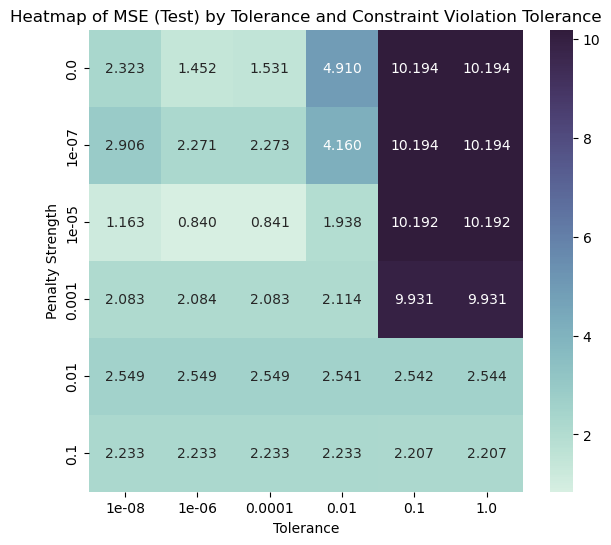

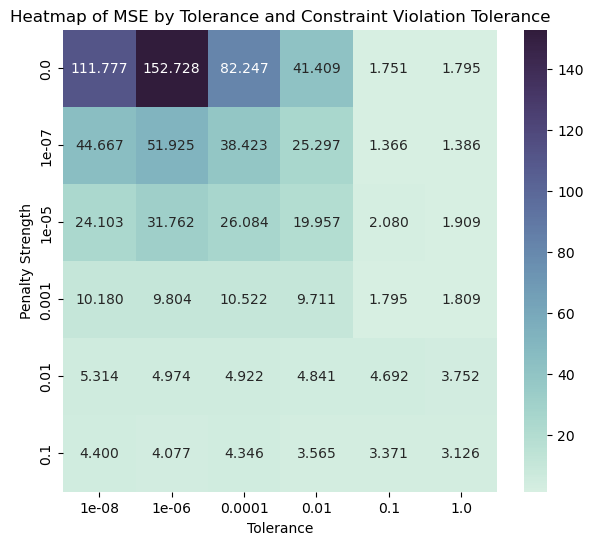

In [30]:
pivot_table = df_reg_tol.pivot(index='Penalty', columns=['Tolerance'], values='MSE_Coll_ODE')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE (Train) by Tolerance and Constraint Violation Tolerance')
plt.ylabel('Penalty Strength')
plt.show()

pivot_table = df_reg_tol.pivot(index='Penalty', columns=['Tolerance'], values='MSE_Coll_ODE_Test')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE (Test) by Tolerance and Constraint Violation Tolerance')
plt.ylabel('Penalty Strength')
plt.show()

pivot_table = df_reg_tol.pivot(index='Penalty', columns=['Tolerance'], values='Times_Elapsed')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE by Tolerance and Constraint Violation Tolerance')
plt.ylabel('Penalty Strength')
plt.show()